In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Show all columns
pd.set_option('display.max_columns', None)

#Nice style to use
plt.style.use('fivethirtyeight')

In [38]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(columns = 'customerID', inplace = True) # drop as not useful when aggregated 

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#Convert TotalCharges to float so that we can apply hist
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

Let's repeat the viz we did from our modeling notebook as it is a good starting point to view the distributions of each feature

First we will plot the columns that require a distribution plot rather than a bar plot due to being a float rather than object 

In [5]:
hists = ['tenure','MonthlyCharges','TotalCharges']

C:\Users\charl\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\charl\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


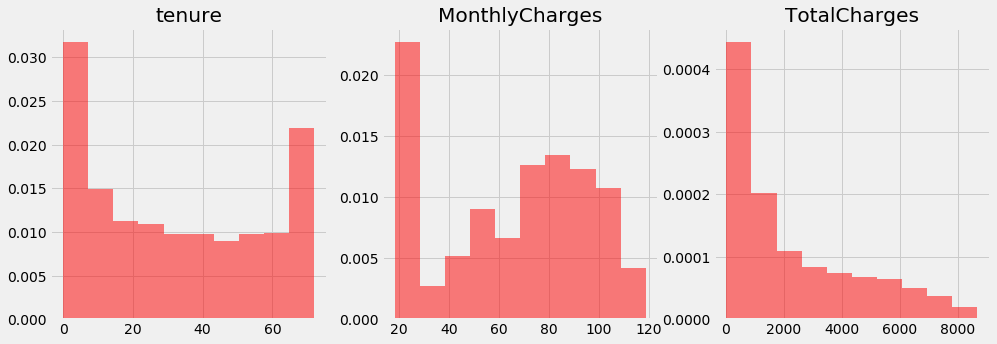

In [37]:
#create figure for our histograms
fig = plt.figure(figsize=(15,5))

for idx, val in enumerate(hists):
    plt.subplot(1,3,idx+1)
    plt.hist(val, data = df, alpha = 0.5, color = 'red', density = 1)
    plt.title(val)

Display the distribution of our object datatypes as bar graphs

In [22]:
cat = df.select_dtypes(include=['object'])

C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


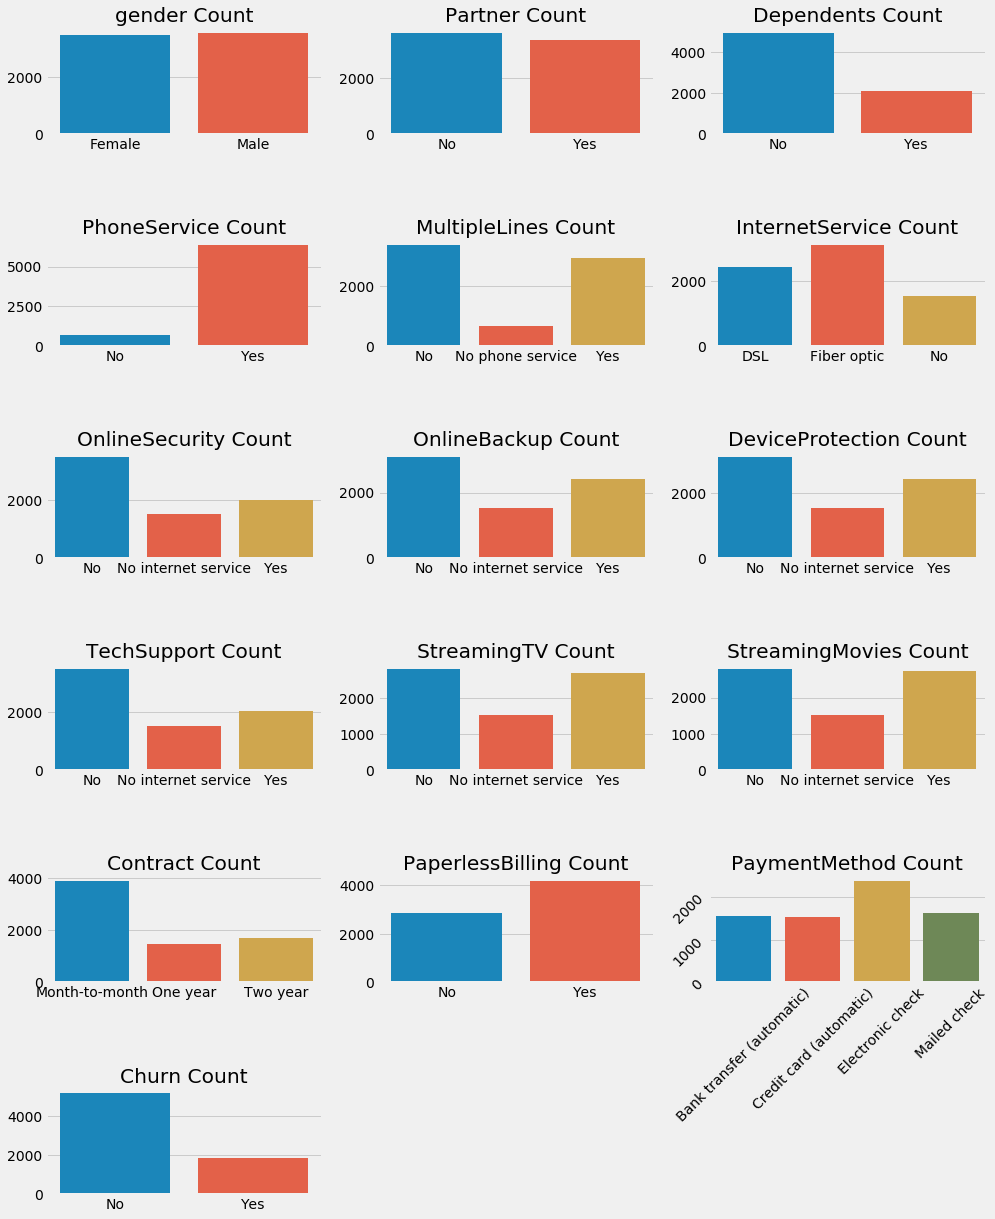

In [36]:
#import math so that we can use ceil function to round our values up for subplotting purposes
import math

#Plot our object datatypes as bars

fig = plt.figure(figsize=(15,20))
for idx, val in enumerate(cat.columns):
    #This ensures we have enough rows to hold all of the plots by dividing by number of columns in df by columns in subplot by and rounding up
    plt.subplot(math.ceil(len(cat.columns)/3),3,idx+1)
    #Sort the values before plotting them... some issues due to names of values...
    #If we really cared, we could change value names so that alphabetically they would appear in desired order
    sns.countplot(x=val, data = cat.sort_values(val))
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation = 0)
    plt.title(str(val+' Count'))
    
#Fix vertical spacing and rotate the last subplot as the labels are too long
plt.subplots_adjust(hspace=1)
plt.subplot(math.ceil(len(cat.columns)/3),3,15).tick_params(labelrotation=45)
#Using barplot and calculating percentage for y axis, we could make these plots more meaningful

### Use Boxplots to investigate relationships of features and churn

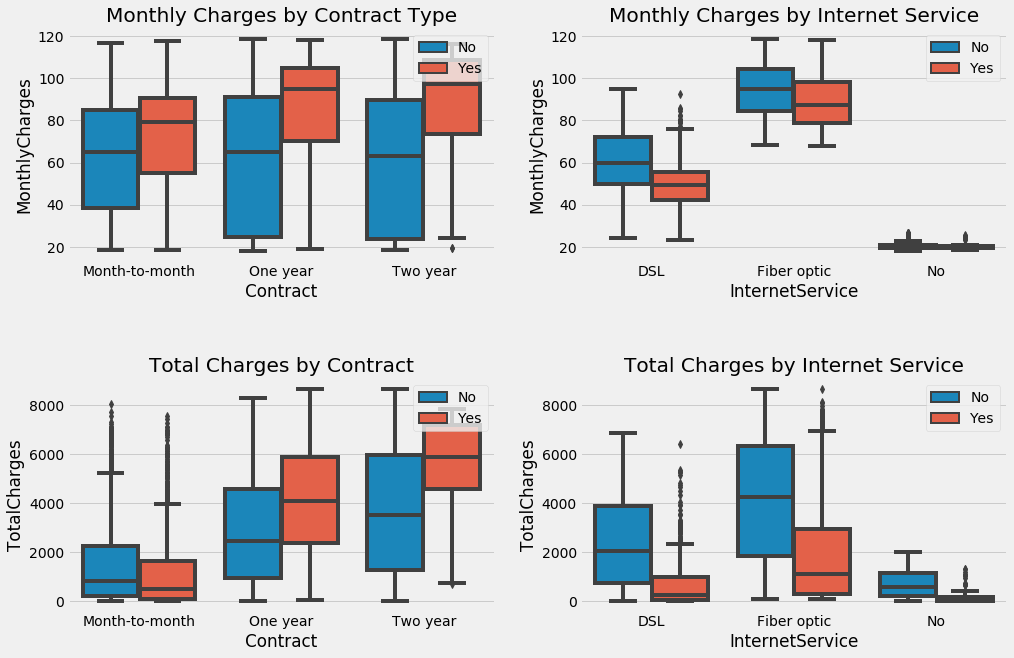

In [36]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
sns.boxplot(x='Contract', y = 'MonthlyCharges', hue = 'Churn',data=df, ax = axes[0][0])
axes[0][0].set_title('Monthly Charges by Contract Type')
axes[0][0].legend(loc =1)

sns.boxplot(x='InternetService', y = 'MonthlyCharges', data=df, hue = 'Churn', ax = axes[0][1])
axes[0][1].set_title('Monthly Charges by Internet Service')
axes[0][1].legend(loc =1)

sns.boxplot(x='Contract', y = 'TotalCharges', data=df, hue = 'Churn', ax = axes[1][0])
axes[1][0].set_title('Total Charges by Contract')
axes[1][0].legend(loc =1)

sns.boxplot(x='InternetService', y = 'TotalCharges', data=df, hue = 'Churn', ax = axes[1][1])
axes[1][1].set_title('Total Charges by Internet Service')
axes[1][1].legend(loc =1)

fig.subplots_adjust(hspace = 0.5)

Surprisingly, we see that those who churn with both DSL and Fiber often have lower monthly payments than those who do not churn.

All other findings are as expected:
- Those who churn tend to have lower life time charges as they have less tenure and are less loyal
- Total charges scales with contract length 
- Higher monthly charges by contract length are more likely to churn